In [2]:
from importlib.metadata import version
import tensorflow
import summa

print(tensorflow.__version__)
print(version('summa'))

2.10.0
1.2.0


In [3]:
import nltk

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [3]:
data = pd.read_csv("C:/Users/Desk_Kang/Desktop/Aiffel/workplace/lib/news_summary_more.csv")
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [4]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
# text가 본문, headlines가 요약
# text가 본문, 추출적 요약에서는 text만 사용

In [8]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [10]:
# 중복이... 있어...?
# csv 파일 열어서 확인해본 결과 headlines, text 중복 확인
# headlines이 중복되는데 text 중복 안하는거 확인
# headlines가 중복되는데 text가 중복이 과연 아닐까...?
# 같은 headlines 같은 text인데 왜 중복이 아니라고 했을까
# 같은 headlines를 가지고 있으면 같다고 판단, 중복제거 실시

In [12]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
# 텍스트 중복 제거
data.drop_duplicates(subset = ['text'], inplace=True)

In [13]:
# headlines 중복 제거
data.drop_duplicates(subset = ['headlines'], inplace=True)

In [14]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98262


In [16]:
# null값 확인
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [17]:
# 정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [18]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [20]:
clean_text = []

for text in data['text']:
    clean_text.append(preprocess_sentence(text))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [23]:
clean_headlines = []

for text in data['headlines']:
    clean_headlines.append(preprocess_sentence(text))

print("Headlines 전처리 후 결과: ", clean_headlines[:5])

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1364\966821911.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Headlines 전처리 후 결과:  ['upgrad learner switches career ml al salary hike', 'delhi techie wins free food swiggy one year cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'known hirani yrs metoo claims true sonam']


In [24]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [25]:
data.head()

,headlines,text
0,upgrad learner switches career ml al salary hike,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food swiggy one year cred,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...


In [26]:
# 데이터 Null값 확인
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [27]:
# 나중에 힘들어지니까 일단 저장
data.to_csv('prep_news_headlines.csv', index=False)

In [4]:
# 전처리한 데이터 불러오기
data = pd.read_csv('prep_news_headlines.csv')

텍스트의 최소 길이 : 18
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10064013189363
요약의 최소 길이 : 1
요약의 최대 길이 : 13
요약의 평균 길이 : 7.1368498183409494


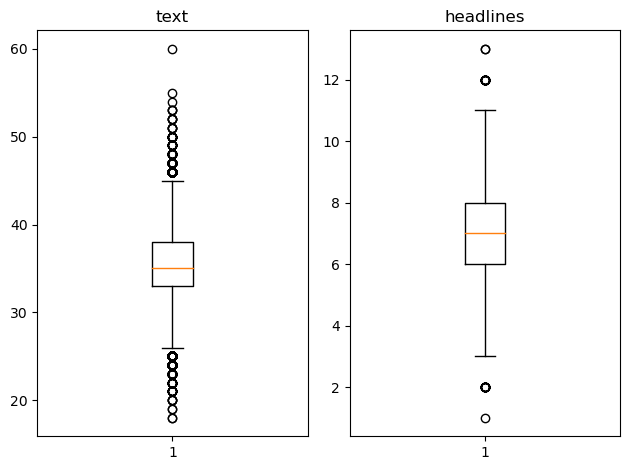

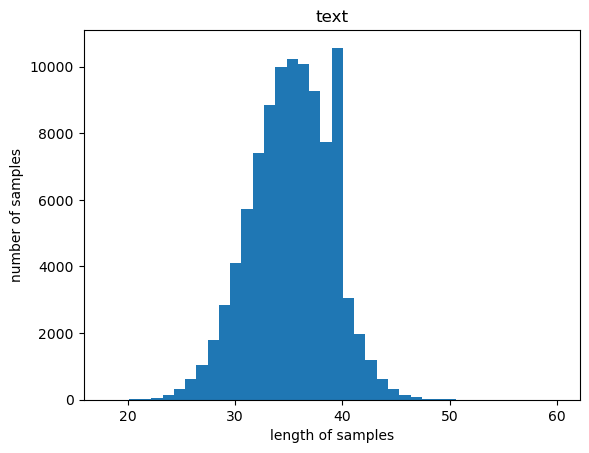

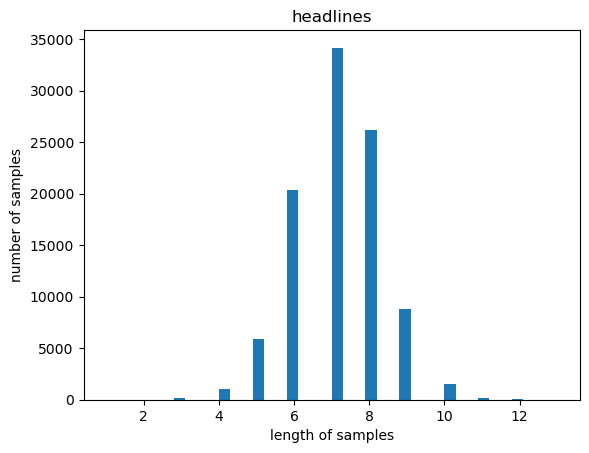

In [5]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [6]:
# 임의 설정
text_max_len = 37
headlines_max_len = 7

In [7]:
# 수치확인용
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [8]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 37 이하인 샘플의 비율: 0.7377392861867883
전체 샘플 중 길이가 7 이하인 샘플의 비율: 0.6263624428817129


In [9]:
# 추후 수치 조절을 위해 저장
# 39 , 8 이면 둘다 1이 뜨는데 이게 맞나...?
# text_max_len = 37 , headlines_max_len = 7 일때 각각 약 0.908 / 0.722

In [10]:
# data.head()

In [11]:

# len(s.split()) for s in data['text']
data = data[data.apply(lambda row : len(row['text'].split()) <= text_max_len and len(row['headlines'].split()) <= headlines_max_len, axis=1)]

In [12]:
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 48381


In [13]:
# 98262에서 48381로 사라짐...

In [14]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
4,known hirani yrs metoo claims true sonam,speaking sexual harassment allegations rajkuma...,sostoken known hirani yrs metoo claims true sonam,known hirani yrs metoo claims true sonam eostoken
6,india get lowest odi total new zealand,india recorded lowest odi total new zealand ge...,sostoken india get lowest odi total new zealand,india get lowest odi total new zealand eostoken
10,cousins fed human excreta friendship boys,two minor cousins uttar pradesh gorakhpur alle...,sostoken cousins fed human excreta friendship ...,cousins fed human excreta friendship boys eost...
12,ram krishna smoke ramdev sadhus kumbh,urging saints seers kumbh mela quit smoking yo...,sostoken ram krishna smoke ramdev sadhus kumbh,ram krishna smoke ramdev sadhus kumbh eostoken
14,cried bidaai felt peer pressure isha ambani,reliance industries chairman mukesh ambani dau...,sostoken cried bidaai felt peer pressure isha ...,cried bidaai felt peer pressure isha ambani eo...


In [15]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력, sostoken
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블, eostoken

In [16]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 랜덤으로 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[38091 36682  4556 ... 37194 18909 26492]


In [17]:
# 정수 시퀀스를 이용하여 데이터 샘플의 순서 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [18]:
# 전체 데이터의 크기에서 0.25에 해당하는 만큼 테스트 데이터
n_of_val = int(len(encoder_input)*0.25)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 12095


In [19]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 36286
훈련 레이블의 개수 : 36286
테스트 데이터의 개수 : 12095
테스트 레이블의 개수 : 12095


In [20]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [21]:
threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 47867
등장 빈도가 9번 이하인 희귀 단어의 수: 36215
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11652
단어 집합에서 희귀 단어의 비율: 75.65755113125952
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.587438886799548


In [22]:
# threshold = 7
# 단어 집합(vocabulary)의 크기 : 47817
# 등장 빈도가 6번 이하인 희귀 단어의 수: 33293
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 14524
# 단어 집합에서 희귀 단어의 비율: 69.62586527803919
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.705078186739781

In [23]:
# threshold = 10
# 단어 집합(vocabulary)의 크기 : 47817
# 등장 빈도가 9번 이하인 희귀 단어의 수: 36126
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11652
# 단어 집합에서 희귀 단어의 비율: 75.55053642010164
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.5591329332630135

In [24]:
# threshold의 기준을 얼마로 잡을것인가?
# 많이 제외시키면 학습할때의 효과는 어떻게 되나
# 제외시키는 단어를 줄이면 표현할 수 있는 단어가 많아지나?
# 단어가 많아지면 특징으로 잡아내는 학습이 힘들지 않을까? => 요약이 힘들어지지 않을까?
# 등장 빈도수가 적으면 잘 안쓰는 단어 => 잘 안쓰는 단어를 이용해서 요약(headlines)을 하진 않을거같다 => 10으로 결정

In [25]:
src_vocab = 11650
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 11,700으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [26]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[1512, 2481, 8453, 81, 2191, 106, 26, 189, 3027, 2178, 4723, 508, 11, 916, 162, 4, 17, 1144, 378, 81, 2191, 189, 11033, 263, 163, 1650, 59, 1, 3151, 883, 159, 145], [53, 273, 1453, 961, 4326, 553, 32, 78, 2140, 480, 148, 19, 273, 233, 4327, 78, 47, 1194, 2331, 1454, 2948, 1453, 1028, 1290, 1971, 297, 317, 253], [54, 200, 23, 3505, 4, 17, 2633, 46, 1324, 9961, 216, 138, 1809, 115, 6799, 1324, 9961, 9962, 3028, 676, 2875, 509, 283, 271, 374, 783, 4478, 2666, 602, 7901, 1592, 163, 6425, 2523]]


In [27]:
#headlines
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [30]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 21714
등장 빈도가 5번 이하인 희귀 단어의 수: 15293
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 6421
단어 집합에서 희귀 단어의 비율: 70.42921617389702
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.937820720952711


In [317]:
# threshold = 7
# 단어 집합(vocabulary)의 크기 : 21714
# 등장 빈도가 6번 이하인 희귀 단어의 수: 15939
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5775
# 단어 집합에서 희귀 단어의 비율: 73.40425531914893
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 12.384353855742281

In [318]:
# threshold = 5
# 단어 집합(vocabulary)의 크기 : 21714
# 등장 빈도가 4번 이하인 희귀 단어의 수: 14386
# 단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7328
# 단어 집합에서 희귀 단어의 비율: 66.25218752878327
# 전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.245347097043863

In [31]:
tar_vocab = 6500
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 1134, 844, 2175, 564, 2175, 632], [1, 3380, 16, 2482, 6423, 152], [1, 36, 2483, 4819, 37, 2005, 3619, 9], [1, 4820, 1285, 3620, 5215, 25, 661], [1, 2484, 4143, 1286, 3191, 3192]]
target
decoder  [[1134, 844, 2175, 564, 2175, 632, 2], [3380, 16, 2482, 6423, 152, 2], [36, 2483, 4819, 37, 2005, 3619, 9, 2], [4820, 1285, 3620, 5215, 25, 661, 2], [2484, 4143, 1286, 3191, 3192, 2]]


In [32]:
# 빈도수가 낮은 단어가 삭제되었음 -> 빈도수가 낮은 단어들로 이루어진 샘플은 빈(empty) 샘플이 됨
# headlines 토큰이 추가되었기에 길이는 0(단어삭제)+1(토큰) 으로 1이 나옴
# headlines 길이 1인 경우를 삭제

In [33]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 2
삭제할 테스트 데이터의 개수 : 1
훈련 데이터의 개수 : 36284
훈련 레이블의 개수 : 36284
테스트 데이터의 개수 : 12094
테스트 레이블의 개수 : 12094


In [34]:
# padding
# 길이가 긴 데이터에 맞게 0 채워넣기

In [35]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

In [36]:
# 인코더 LSTM
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

In [37]:
# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.3)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

In [38]:

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

In [39]:
# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.3)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

In [40]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

In [41]:
# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])

In [42]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 37, 128)      1491200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 37, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

 lstm_3 (LSTM)                  [(None, None, 256),  394240      ['embedding_1[0][0]',            
                                 (None, 256),                     'lstm_2[0][1]',                 
                                 (None, 256)]                     'lstm_2[0][2]']                 
                                                                                                  
 dense (Dense)                  (None, None, 6500)   1670500     ['lstm_3[0][0]']                 
                                                                                                  
Total params: 5,832,804
Trainable params: 5,832,804
Non-trainable params: 0
__________________________________________________________________________________________________


In [43]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 37, 128)      1491200     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 37, 256),    394240      ['embedding[0][0]']              
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                            

 dense_1 (Dense)                (None, None, 6500)   3334500     ['concat_layer[0][0]']           
                                                                                                  
Total params: 7,497,060
Trainable params: 7,497,060
Non-trainable params: 0
__________________________________________________________________________________________________


In [44]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
142/142 [==============================] - 20s 77ms/step - loss: 6.5586 - val_loss: 6.1292
Epoch 2/50
142/142 [==============================] - 10s 70ms/step - loss: 6.1266 - val_loss: 5.8960
Epoch 3/50
142/142 [==============================] - 10s 71ms/step - loss: 5.8579 - val_loss: 5.6521
Epoch 4/50
142/142 [==============================] - 10s 69ms/step - loss: 5.6019 - val_loss: 5.4662
Epoch 5/50
142/142 [==============================] - 10s 68ms/step - loss: 5.3818 - val_loss: 5.3431
Epoch 6/50
142/142 [==============================] - 10s 69ms/step - loss: 5.1966 - val_loss: 5.2270
Epoch 7/50
142/142 [==============================] - 10s 69ms/step - loss: 5.0314 - val_loss: 5.1495
Epoch 8/50
142/142 [==============================] - 10s 69ms/step - loss: 4.8719 - val_loss: 5.0741
Epoch 9/50
142/142 [==============================] - 10s 69ms/step - loss: 4.7184 - val_loss: 5.0175
Epoch 10/50
142/142 [==============================] - 10s 69ms/step - loss: 4.570

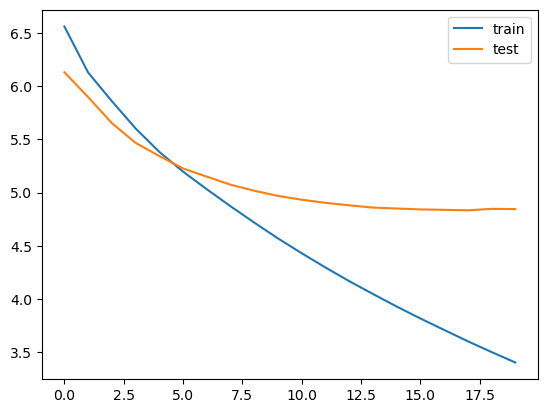

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [55]:
# 20회 진행 후 early stopping 발동

In [47]:
#인퍼런스 모델 구현
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [48]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [49]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

In [50]:
# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

In [51]:
# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [52]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [53]:
#모델 테스트
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0 and i!='sostoken' and i!='eostoken'):
            temp = temp + src_index_to_word[i]+' '
    return temp

In [56]:
for i in range(1, 50):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : bengaluru city police ordered prohibition sale liquor areas precautionary measure prevent possible violence procession immersion sunday thousands people reportedly expected attend procession around ganesh idols police believe could incidents violence 
실제 요약 : said producer sharma wanted talking 
1/1 [==============================] - 0s 27ms/step
예측 요약 :  delhi police stations cleaning


원문 : production held maruti suzuki factory thursday morning leopard spotted cctv footage factory premises seven member team deployed rescue leopard gurugram wildlife vinod kumar said unable spot leopard plant processing unit basement dark added 
실제 요약 : said tribute wait covering engineers abuse 
1/1 [==============================] - 0s 31ms/step
예측 요약 :  dead boat capsizes


원문 : peta sought supreme court ban continued alleging evidence animal torture tournaments tamil nadu peta released page report evidence show bulls sharp weapons bleeding even men biting tail animal 
실제 요약 : said group pain r

In [ ]:
#추출적 요약

In [57]:
import requests
from summa import keywords
from summa.summarizer import summarize

In [58]:
summa_t = "india industrial output grew year year september government data friday stated index industrial production mining sector rose manufacturing grew september highest growth registered coal sector posted growth year year followed petroleum natural gas "

summa_t2 = "India's industrial output grew 3.8% year-on-year in September, government data on Friday stated. The Index of Industrial Production for mining sector rose 7.9%, while that for manufacturing grew 3.4% in September. The highest growth was registered in the coal sector, which posted 10.6% growth year-on-year, followed by petroleum refinery at 8% and natural gas at 6.3%."


In [64]:
print(summarize(summa_t, ratio=0.5))


In [65]:
print(summarize(summa_t2, ratio=0.5))

The Index of Industrial Production for mining sector rose 7.9%, while that for manufacturing grew 3.4% in September.


In [63]:

print(keywords.keywords(summa_t))


industrial
sector
growth
grew year


In [62]:
print(keywords.keywords(summa_t2))

growth
industrial output
production
